In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
Data=pd.read_csv('https://raw.githubusercontent.com/tausif-blr/adm/main/Admission_Predict%20-%20Admission_Predict.csv')
Data

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,1
1,2,324,107,4,4.0,4.5,8.87,1,1
2,3,316,104,3,3.0,3.5,8.00,1,0
3,4,322,110,3,3.5,2.5,8.67,1,1
4,5,314,103,2,2.0,3.0,8.21,0,0
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,1
396,397,325,107,3,3.0,3.5,9.11,1,1
397,398,330,116,4,5.0,4.5,9.45,1,1
398,399,312,103,3,3.5,4.0,8.78,0,0


# This data sheet is About Graduate Admission from Indian Student Perspective 
# Objective of student getting Admission Of Masters
-GRE: GRE Score (out of 340)
- TOFEL Scores: TOFEL Score(out of 120)
- Uiversity Rating: University Rating(out of 5)
- SOP: Strength of statement of purpose(out of 5)
- LOR: Strength of letter of Recommendation(out of 5)
- CGPA: Undergraduaate CGPA(out of 10)
- Ressearch : Ressearch Experience(Either 0 or 1)
# ALL Above Are Features /Predictors
Chances of Admit: Chance of Admssion(Target/Dependent Variable)

In [3]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    int64  
dtypes: float64(3), int64(6)
memory usage: 28.2 KB


In [4]:
Data.describe(include='all')

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.450000
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.498117
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.000000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.000000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.000000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,1.000000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,1.000000


- we have total 400 samples with 8 feature and 1 target variable and Drop the serial no Feature as it is a redundent Feature
- all feature provided are numerical
- wee need to convert Target and Research to object Datatype from int Datatype

In [5]:
## Change Datatype for Research
Data['Research']= Data['Research'].astype(object)
Data.dtypes

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research              object
Chance of Admit        int64
dtype: object

In [6]:
Data['Chance of Admit']= Data['Chance of Admit'].astype(int)
Data.dtypes

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research              object
Chance of Admit        int64
dtype: object

In [7]:
# remove Redundant features
Data_New=Data.drop('Serial No.', axis=1)
Data_New

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,1
1,324,107,4,4.0,4.5,8.87,1,1
2,316,104,3,3.0,3.5,8.00,1,0
3,322,110,3,3.5,2.5,8.67,1,1
4,314,103,2,2.0,3.0,8.21,0,0
...,...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1,1
396,325,107,3,3.0,3.5,9.11,1,1
397,330,116,4,5.0,4.5,9.45,1,1
398,312,103,3,3.5,4.0,8.78,0,0


# split Data into predictors and Target

In [8]:
#split data into predictors and targets
Predictors= Data_New.iloc[:,:-1]
Target= Data_New.iloc[:,-1:]
print(Predictors.head())
print(Target.head())

   GRE Score  TOEFL Score  University Rating  SOP  LOR  CGPA Research
0        337          118                  4  4.5  4.5  9.65        1
1        324          107                  4  4.0  4.5  8.87        1
2        316          104                  3  3.0  3.5  8.00        1
3        322          110                  3  3.5  2.5  8.67        1
4        314          103                  2  2.0  3.0  8.21        0
   Chance of Admit
0                1
1                1
2                0
3                1
4                0


# Check the Distribution Of your Data
- plot histogram

<function matplotlib.pyplot.show>

<Figure size 1080x720 with 0 Axes>

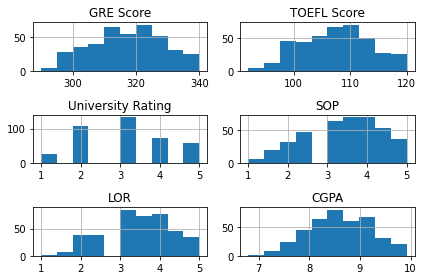

In [9]:
plt.figure(figsize=(15,10))
Predictors.hist()
plt.tight_layout()#adjust the subplots
plt.show

<Figure size 360x576 with 0 Axes>

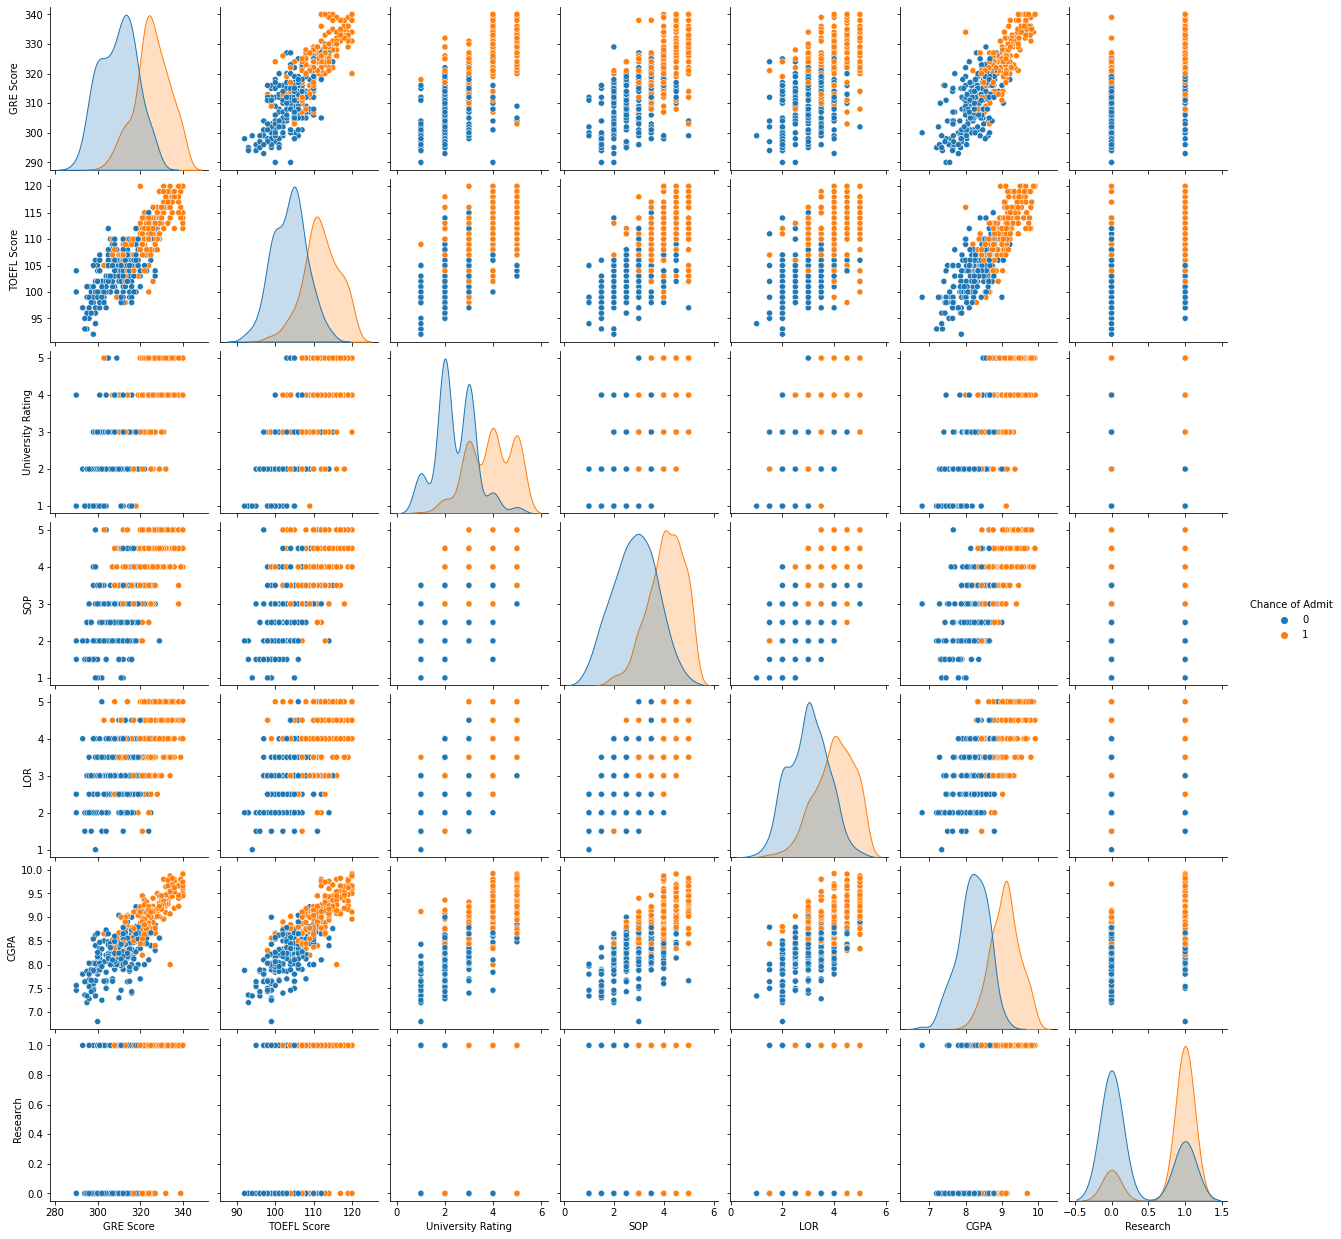

In [10]:
plt.figure(figsize=(5,8))
sns.pairplot(data=Data_New,hue= 'Chance of Admit')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Count')

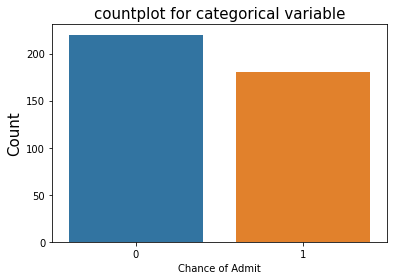

In [11]:
sns.countplot(Target['Chance of Admit'])
plt.title('countplot for categorical variable', fontsize=15)
plt.xlabel('Chance of Admit')
plt.ylabel('Count',fontsize=15)


In [12]:
from sklearn.preprocessing import StandardScaler
SS=StandardScaler()
X=SS.fit_transform(Predictors)
print(X)

[[ 1.76210664  1.74697064  0.79882862 ...  1.16732114  1.76481828
   0.90911166]
 [ 0.62765641 -0.06763531  0.79882862 ...  1.16732114  0.45515126
   0.90911166]
 [-0.07046681 -0.56252785 -0.07660001 ...  0.05293342 -1.00563118
   0.90911166]
 ...
 [ 1.15124883  1.41704229  0.79882862 ...  1.16732114  1.42900622
   0.90911166]
 [-0.41952842 -0.72749202 -0.07660001 ...  0.61012728  0.30403584
  -1.09997489]
 [ 1.41304503  1.58200646  0.79882862 ...  0.61012728  1.78160888
   0.90911166]]


In [13]:
#feature engineering
X= Predictors
Y=Target
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test= train_test_split(X, Target,test_size=0.2,random_state=0)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(320, 7) (320, 1)
(80, 7) (80, 1)


In [14]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(criterion='entropy', random_state=0)
DT.fit (X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

[Text(0.49609375, 0.9583333333333334, 'X[5] <= 8.735\nentropy = 0.996\nsamples = 320\nvalue = [172, 148]'),
 Text(0.17447916666666666, 0.875, 'X[5] <= 8.205\nentropy = 0.588\nsamples = 184\nvalue = [158, 26]'),
 Text(0.15364583333333334, 0.7916666666666666, 'entropy = 0.0\nsamples = 84\nvalue = [84, 0]'),
 Text(0.1953125, 0.7916666666666666, 'X[2] <= 2.5\nentropy = 0.827\nsamples = 100\nvalue = [74, 26]'),
 Text(0.041666666666666664, 0.7083333333333334, 'X[4] <= 1.75\nentropy = 0.431\nsamples = 34\nvalue = [31, 3]'),
 Text(0.020833333333333332, 0.625, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.0625, 0.625, 'X[6] <= 0.5\nentropy = 0.33\nsamples = 33\nvalue = [31, 2]'),
 Text(0.041666666666666664, 0.5416666666666666, 'entropy = 0.0\nsamples = 21\nvalue = [21, 0]'),
 Text(0.08333333333333333, 0.5416666666666666, 'X[0] <= 312.0\nentropy = 0.65\nsamples = 12\nvalue = [10, 2]'),
 Text(0.0625, 0.4583333333333333, 'X[1] <= 105.5\nentropy = 0.971\nsamples = 5\nvalue = [3, 2]'),
 Tex

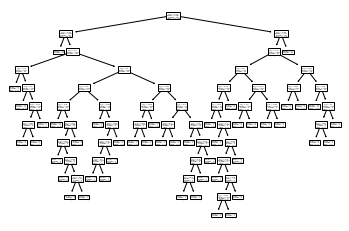

In [15]:
from sklearn import tree
tree.plot_tree(DT)

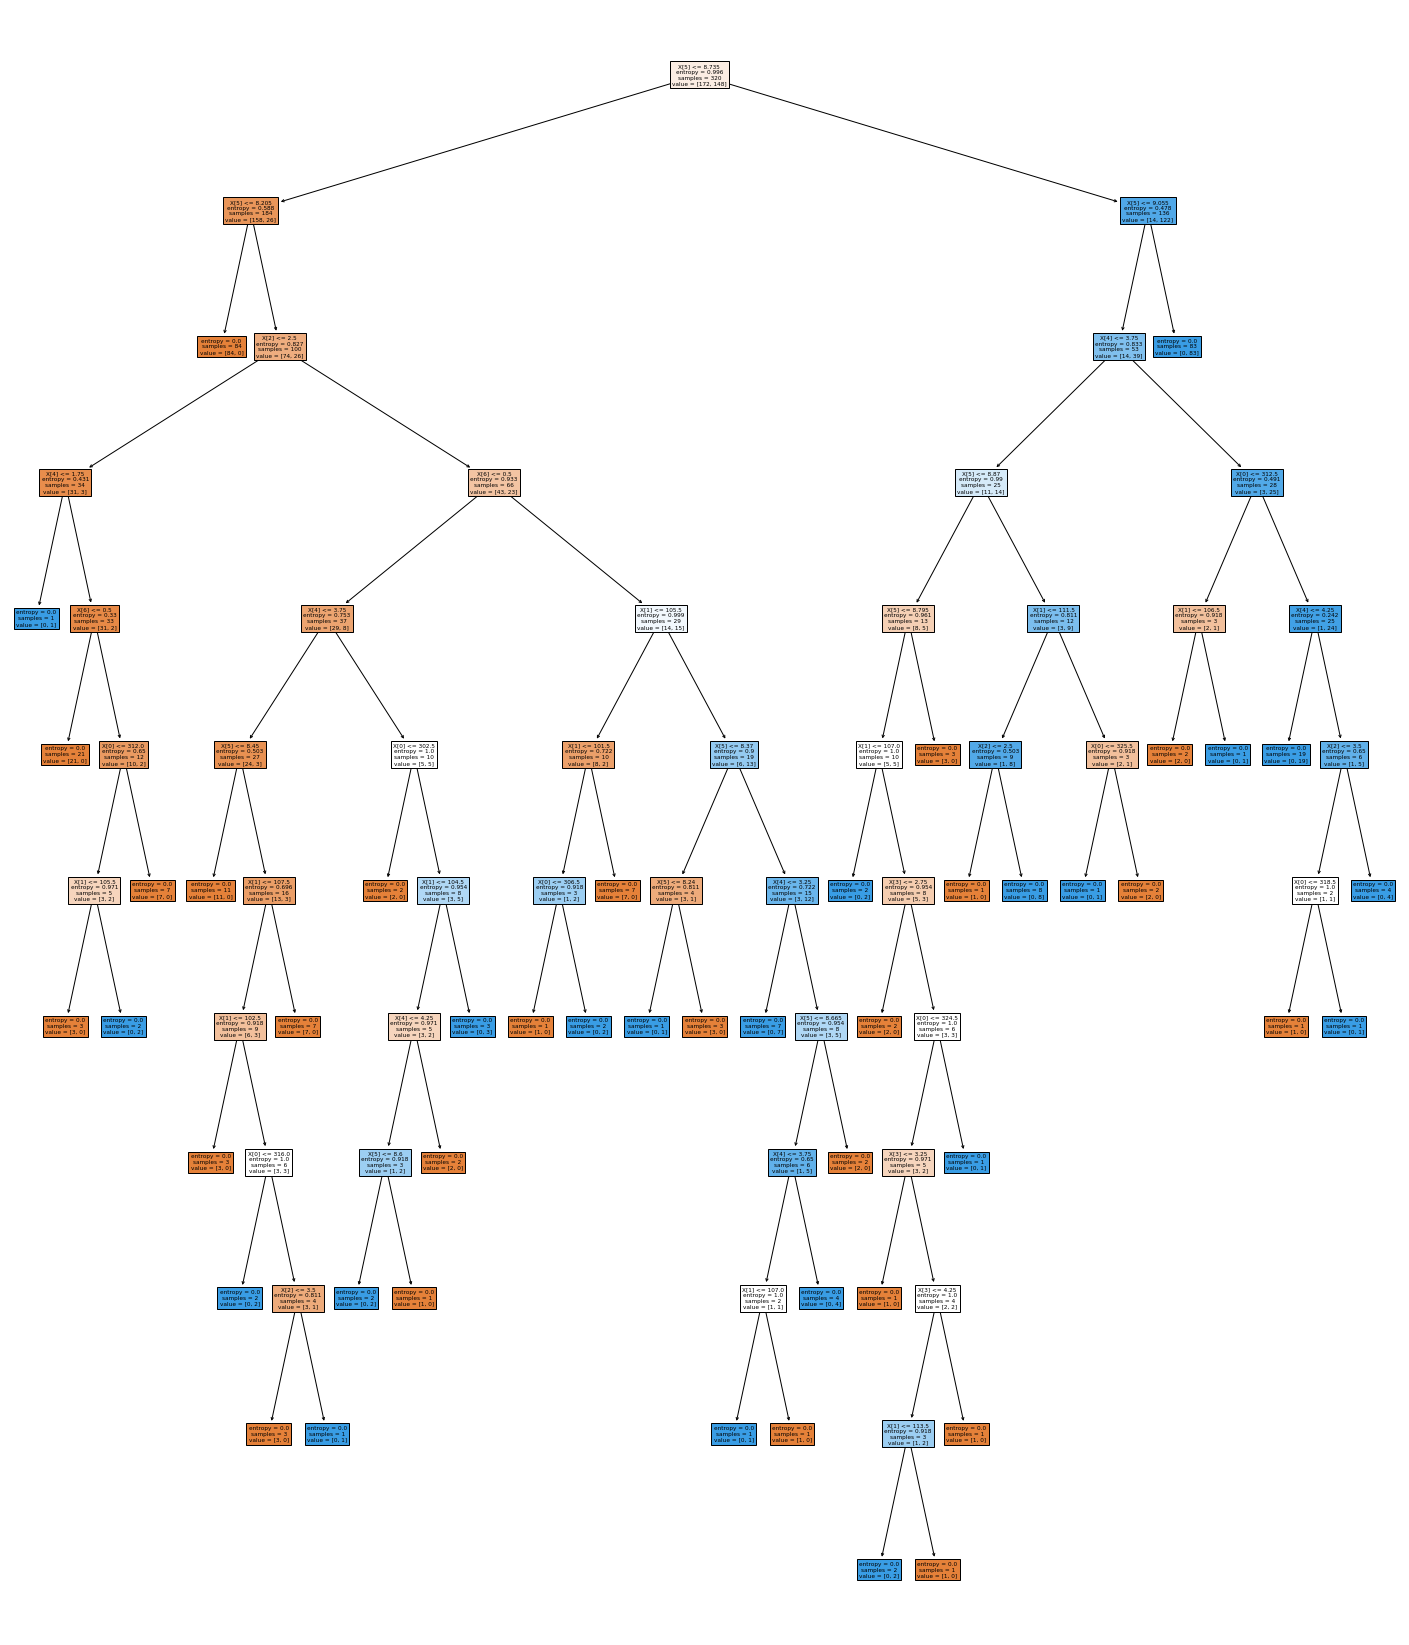

In [16]:
fig= plt.figure(figsize=(25,30))
_=tree.plot_tree(DT, filled=True)

In [17]:
#now check test data
Y_predicted=DT.predict(X_test)#Y predicted data from X_test data

In [18]:
#confusion matrix
from sklearn.metrics import confusion_matrix
CM=confusion_matrix(Y_test,Y_predicted)
print(CM)

[[37 11]
 [ 7 25]]


In [19]:
Accuracy=((CM[0,0]+CM[1,1])/sum(sum(CM)))*100
print('accuracy of model=',Accuracy,"%")
Precision= (CM[0,0]/(CM[0,0]+CM[1,0]))*100
print('precision of model=',Precision,'%')
Recall=(CM[0,0]/(CM[0,0]+CM[0,1]))*100
print('Recall of model=',Recall,'%')
print('F-Score of model=',(2*Precision*Recall/(Precision+Recall)),'%')

accuracy of model= 77.5 %
precision of model= 84.0909090909091 %
Recall of model= 77.08333333333334 %
F-Score of model= 80.43478260869566 %


In [20]:
from sklearn.metrics import precision_recall_fscore_support
P,RC,F1,Array= precision_recall_fscore_support(Y_test, Y_predicted)

In [21]:
print("precesion=",P[0],'\n','Recall=',RC[0],'\n','F-Score=',F1[0])

precesion= 0.8409090909090909 
 Recall= 0.7708333333333334 
 F-Score= 0.8043478260869567


In [22]:
from sklearn.ensemble import RandomForestClassifier
RFC=RandomForestClassifier(n_estimators=8, random_state=0) #n_estimator is Depth or required no of decision trees
RFC.fit(X_train,Y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(n_estimators=8, random_state=0)

In [23]:
#now check test data
Y_predicted=RFC.predict(X_test)#Y predicted data from X_test data

In [24]:
#confusion matrix
from sklearn.metrics import confusion_matrix
CM=confusion_matrix(Y_test,Y_predicted)
print(CM)

[[45  3]
 [ 7 25]]


In [25]:
Accuracy=((CM[0,0]+CM[1,1])/sum(sum(CM)))*100
print('accuracy of model=',Accuracy,"%")
Precision= (CM[0,0]/(CM[0,0]+CM[1,0]))*100
print('precision of model=',Precision,'%')
Recall=(CM[0,0]/(CM[0,0]+CM[0,1]))*100
print('Recall of model=',Recall,'%')
print('F-Score of model=',(2*Precision*Recall/(Precision+Recall)),'%')

accuracy of model= 87.5 %
precision of model= 86.53846153846155 %
Recall of model= 93.75 %
F-Score of model= 90.00000000000001 %


In [26]:
from sklearn.metrics import precision_recall_fscore_support
P,RC,F1,Array= precision_recall_fscore_support(Y_test, Y_predicted)

In [27]:
print("precesion=",P[0],'\n','Recall=',RC[0],'\n','F-Score=',F1[0])

precesion= 0.8653846153846154 
 Recall= 0.9375 
 F-Score= 0.9


#performance Evaluation
1. Training data
2. Test data

# 1.Training Data

In [28]:
#classification Report
from sklearn.metrics import classification_report # genratin report
Y_train_pred=DT.predict(X_train)#how to get actual  and predicted data for training data
DT_trainging_results= classification_report(Y_train,Y_train_pred)#pass actual and predicted values
print(DT_trainging_results)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       172
           1       1.00      1.00      1.00       148

    accuracy                           1.00       320
   macro avg       1.00      1.00      1.00       320
weighted avg       1.00      1.00      1.00       320



In [29]:
Y_test_pred=DT.predict(X_test)#how to get actual  and predicted data for training data
DT_test_results= classification_report(Y_test,Y_test_pred)#pass actual and predicted values
print(DT_test_results)

              precision    recall  f1-score   support

           0       0.84      0.77      0.80        48
           1       0.69      0.78      0.74        32

    accuracy                           0.78        80
   macro avg       0.77      0.78      0.77        80
weighted avg       0.78      0.78      0.78        80



# By looking at training and test data of the model it clearly indicates that the mdel is over fit

# now for random forest

In [30]:
#classification Report
from sklearn.metrics import classification_report # genratin report
Y_train_pred=RFC.predict(X_train)#how to get actual  and predicted data for training data
RFC_trainging_results= classification_report(Y_train,Y_train_pred)#pass actual and predicted values
print(RFC_trainging_results)


              precision    recall  f1-score   support

           0       0.99      0.99      0.99       172
           1       0.99      0.99      0.99       148

    accuracy                           0.99       320
   macro avg       0.99      0.99      0.99       320
weighted avg       0.99      0.99      0.99       320



In [31]:
Y_test_pred=RFC.predict(X_test)#how to get actual  and predicted data for training data
RFC_test_results= classification_report(Y_test,Y_test_pred)#pass actual and predicted values
print(RFC_test_results)

              precision    recall  f1-score   support

           0       0.87      0.94      0.90        48
           1       0.89      0.78      0.83        32

    accuracy                           0.88        80
   macro avg       0.88      0.86      0.87        80
weighted avg       0.88      0.88      0.87        80



# Improve the performance of DT and RFC by tuning Hyperparameters

In [32]:
from sklearn.tree import DecisionTreeClassifier
DT_H = DecisionTreeClassifier(criterion='entropy', max_depth=8, max_leaf_nodes=5, min_samples_split=5, random_state=0)
DT_H.fit (X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=8, max_leaf_nodes=5,
                       min_samples_split=5, random_state=0)

[Text(0.49609375, 0.9583333333333334, 'X[5] <= 8.735\nentropy = 0.996\nsamples = 320\nvalue = [172, 148]'),
 Text(0.17447916666666666, 0.875, 'X[5] <= 8.205\nentropy = 0.588\nsamples = 184\nvalue = [158, 26]'),
 Text(0.15364583333333334, 0.7916666666666666, 'entropy = 0.0\nsamples = 84\nvalue = [84, 0]'),
 Text(0.1953125, 0.7916666666666666, 'X[2] <= 2.5\nentropy = 0.827\nsamples = 100\nvalue = [74, 26]'),
 Text(0.041666666666666664, 0.7083333333333334, 'X[4] <= 1.75\nentropy = 0.431\nsamples = 34\nvalue = [31, 3]'),
 Text(0.020833333333333332, 0.625, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.0625, 0.625, 'X[6] <= 0.5\nentropy = 0.33\nsamples = 33\nvalue = [31, 2]'),
 Text(0.041666666666666664, 0.5416666666666666, 'entropy = 0.0\nsamples = 21\nvalue = [21, 0]'),
 Text(0.08333333333333333, 0.5416666666666666, 'X[0] <= 312.0\nentropy = 0.65\nsamples = 12\nvalue = [10, 2]'),
 Text(0.0625, 0.4583333333333333, 'X[1] <= 105.5\nentropy = 0.971\nsamples = 5\nvalue = [3, 2]'),
 Tex

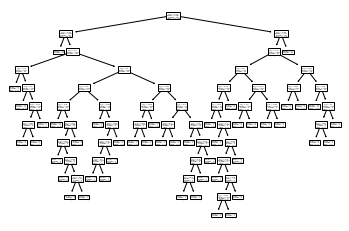

In [33]:
from sklearn import tree
tree.plot_tree(DT)

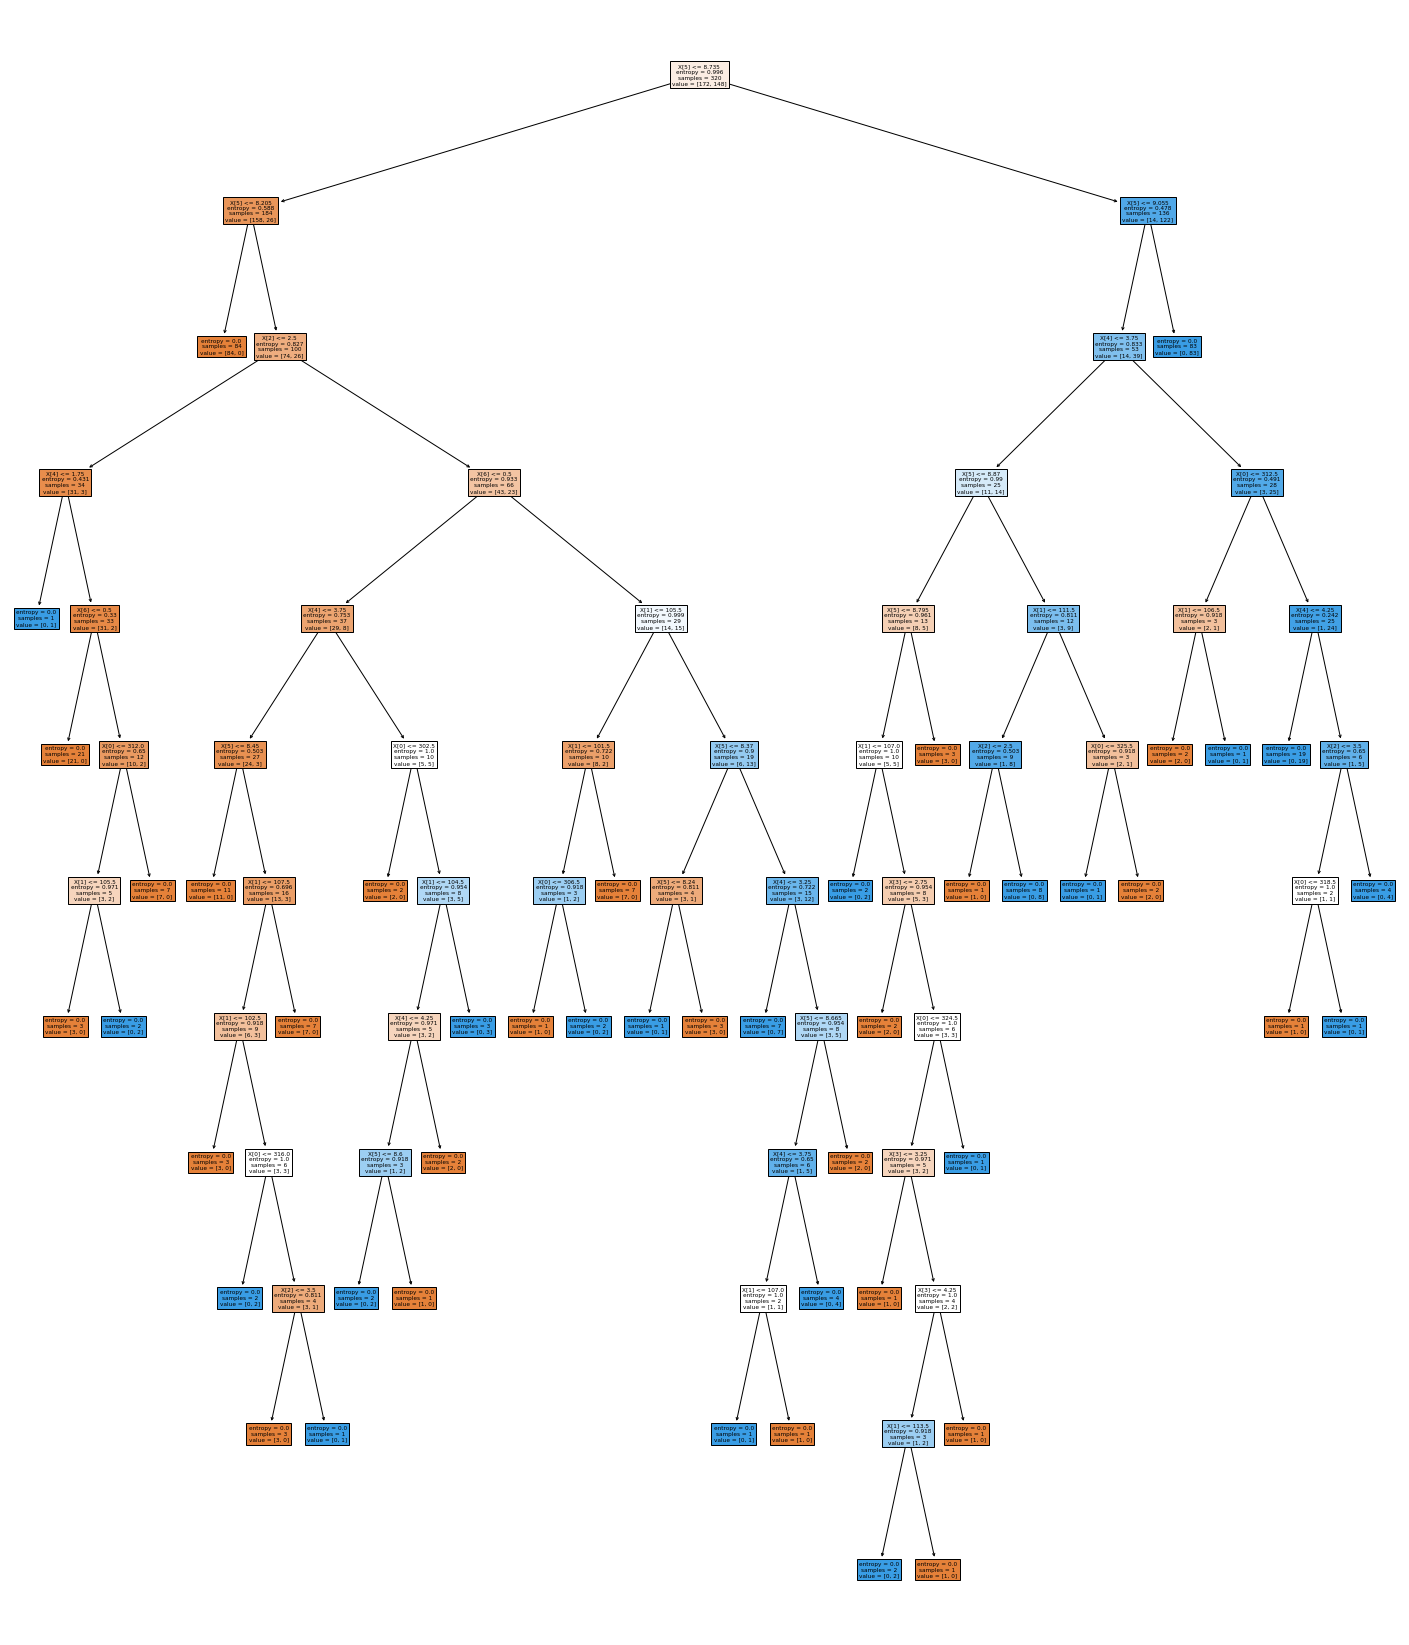

In [34]:
fig= plt.figure(figsize=(25,30))
_=tree.plot_tree(DT, filled=True)

In [35]:
#now check test data
Y_train_pred=DT_H.predict(X_train)#Y predicted data from X_test data
DT_trainging_results= classification_report(Y_train,Y_train_pred)#pass actual and predicted values
print(DT_trainging_results)

              precision    recall  f1-score   support

           0       0.86      0.92      0.89       172
           1       0.90      0.82      0.86       148

    accuracy                           0.88       320
   macro avg       0.88      0.87      0.87       320
weighted avg       0.88      0.88      0.87       320



In [36]:
#now check test data
Y_test_pred=DT_H.predict(X_test)#Y predicted data from X_test data
DT_test_results= classification_report(Y_test,Y_test_pred)#pass actual and predicted values
print(DT_test_results)

              precision    recall  f1-score   support

           0       0.90      0.94      0.92        48
           1       0.90      0.84      0.87        32

    accuracy                           0.90        80
   macro avg       0.90      0.89      0.89        80
weighted avg       0.90      0.90      0.90        80



In [37]:
#classification report
def model_performance_results(model,X,Y_actual):
  Y_predicted=model.predict(X)
  results=classification_report(Y_actual,Y_predicted)
  print(results)
  return results

In [38]:
#training Results
Train_result= model_performance_results(DT_H,X_train,Y_train)

              precision    recall  f1-score   support

           0       0.86      0.92      0.89       172
           1       0.90      0.82      0.86       148

    accuracy                           0.88       320
   macro avg       0.88      0.87      0.87       320
weighted avg       0.88      0.88      0.87       320



In [39]:
#test Results
Test_result= model_performance_results(DT_H,X_test,Y_test)

              precision    recall  f1-score   support

           0       0.90      0.94      0.92        48
           1       0.90      0.84      0.87        32

    accuracy                           0.90        80
   macro avg       0.90      0.89      0.89        80
weighted avg       0.90      0.90      0.90        80



# using sklearn grid search cv to tune hyperparameters
- grid search cv will try all possible combination we give and returns best combination of hyperparameters 
- we need to give set of parameters we want to experiment with

1. Create Dictonary with list of hyper parameters to try
2. classifier needed to provided
- pass these info to gridsearchcv function

In [40]:
from sklearn.model_selection import GridSearchCV
Hyperparameters_dict=[{'max_depth':range(5,12),'min_samples_split':range(4,10),'min_samples_leaf':range(3,10),'max_leaf_nodes':range(3,10)}]
DTC = DecisionTreeClassifier(random_state=0)
DT_gridcv=GridSearchCV(estimator=DTC,param_grid=Hyperparameters_dict)
DT_gridcv_best_model=DT_gridcv.fit(X_train,Y_train)

In [41]:
print('the best parameters for the given model are:',DT_gridcv_best_model.best_params_)

the best parameters for the given model are: {'max_depth': 5, 'max_leaf_nodes': 6, 'min_samples_leaf': 4, 'min_samples_split': 4}


In [42]:
#now build DT using best hyperparameters recived from gridsearchcv
DT_BFM = DecisionTreeClassifier(criterion='entropy', max_depth=5, max_leaf_nodes=5, min_samples_leaf=4,min_samples_split=4, random_state=0)
DT_BFM.fit (X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, max_leaf_nodes=5,
                       min_samples_leaf=4, min_samples_split=4, random_state=0)

In [43]:
Train_result= model_performance_results(DT_BFM,X_train,Y_train)

              precision    recall  f1-score   support

           0       0.86      0.92      0.89       172
           1       0.90      0.82      0.86       148

    accuracy                           0.88       320
   macro avg       0.88      0.87      0.87       320
weighted avg       0.88      0.88      0.87       320



In [44]:
Test_result= model_performance_results(DT_BFM,X_test,Y_test)

              precision    recall  f1-score   support

           0       0.90      0.94      0.92        48
           1       0.90      0.84      0.87        32

    accuracy                           0.90        80
   macro avg       0.90      0.89      0.89        80
weighted avg       0.90      0.90      0.90        80



# Improve the performance of RFC by tuning Hyperparameters

In [45]:
#classification report
def model_performance_results(model,X,Y_actual):
  Y_predicted=model.predict(X)
  results=classification_report(Y_actual,Y_predicted)
  print(results)
  return results

In [ ]:
from sklearn.model_selection import GridSearchCV
Hyperparameters_dict=[{'n_estimators':[5,10,15,20,25],'max_depth':[5,8,10,12,15],'min_samples_split':range(4,10),'min_samples_leaf':range(2,15,2),'max_leaf_nodes':range(3,15,2)}]
RF = RandomForestClassifier(criterion='entropy', random_state=0)
RF_gridcv=GridSearchCV(estimator=RF,param_grid=Hyperparameters_dict)
RF_gridcv_best_model=RF_gridcv.fit(X_train,Y_train)

In [51]:
print('the best parameters for the given model are:',RF_gridcv_best_model.best_params_)

the best parameters for the given model are: {'max_depth': 5, 'max_leaf_nodes': 9, 'min_samples_leaf': 4, 'min_samples_split': 4, 'n_estimators': 5}


In [61]:
print(RF_gridcv_best_model.best_params_.get('max_depth'))

5


In [63]:
RF_BFM = RandomForestClassifier(n_estimators=RF_gridcv_best_model.best_params_.get('n_estimators'), 
                                max_depth=RF_gridcv_best_model.best_params_.get('max_depth'),
                               max_leaf_nodes=RF_gridcv_best_model.best_params_.get('max_leaf_nodes'), 
                               min_samples_leaf=RF_gridcv_best_model.best_params_.get('min_samples_leaf'),
                               min_samples_split=RF_gridcv_best_model.best_params_.get('min_samples_split'), random_state=0)
RF_BFM.fit (X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(max_depth=5, max_leaf_nodes=9, min_samples_leaf=4,
                       min_samples_split=4, n_estimators=5, random_state=0)

In [52]:
#now build RF using best hyperparameters recived from gridsearchcv
RF_BFM = RandomForestClassifier(n_estimators=5, max_depth=5, max_leaf_nodes=9, min_samples_leaf=4,min_samples_split=4, random_state=0)
RF_BFM.fit (X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(max_depth=5, max_leaf_nodes=9, min_samples_leaf=4,
                       min_samples_split=4, n_estimators=5, random_state=0)

In [64]:
Train_result= model_performance_results(RF_BFM,X_train,Y_train)

              precision    recall  f1-score   support

           0       0.90      0.93      0.91       172
           1       0.92      0.88      0.90       148

    accuracy                           0.91       320
   macro avg       0.91      0.90      0.91       320
weighted avg       0.91      0.91      0.91       320



In [65]:
Test_result= model_performance_results(RF_BFM,X_test,Y_test)

              precision    recall  f1-score   support

           0       0.85      0.85      0.85        48
           1       0.78      0.78      0.78        32

    accuracy                           0.82        80
   macro avg       0.82      0.82      0.82        80
weighted avg       0.82      0.82      0.82        80



# Above model has best training and test accuracy , so this model can be used as a final production Deployment